# Data Understanding

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
data_raw = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Documents\DATASET\loan_data_2007_2014.csv')
data_raw

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9360\3276439578.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Documents\DATASET\loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

### memeriksa apakah setiap baris dalam data mewakili satu individu


In [4]:
# mengecek jumlah kolom unik pada kolom id dan member id
jumlah_baris_unik_1 = data_raw['id'].nunique()
jumlah_baris_unik_2 = data_raw['member_id'].nunique()

# cek apakah setiap baris mewakili satu individu
if jumlah_baris_unik_1 == jumlah_baris_unik_2:
    print('setiap baris mewakili satu individu')
else:
    print('ada duplikasi dalam data')

setiap baris mewakili satu individu


In [5]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# Features Engineering


Drop kolom yang tidak digunakan

In [6]:
cols_to_drop = [
    # unique id
    'Unnamed: 0',
    'id',
    'member_id',
    
    # free text
    'url',
    'desc',
    
    # all null/constant/dll
    'zip_code',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'mths_since_last_major_derog',
    'tot_coll_amt',
    'tot_cur_bal',
    'total_rev_hi_lim',
    
    # expert judgment
    'sub_grade'
]

In [7]:
# menghapus kolom kolom yg terdaftar dlm cols_to_drop
data_raw.drop(cols_to_drop, axis=1, inplace=True)

# menampilkan informasi dataset setelah penghapusan kolom
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_title                   438697 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  issue_d                     466285 non-null  object 
 13  loan_status   

Mendefinisikan Variabel Target (Variabel Dependent)


In [8]:
# menghitung persentase distribusi nilai dalam kolom loan_status untuk mendapatkan proporsi nilai dalam bentuk persentase
persentase_loan_status = data_raw.loan_status.value_counts(normalize=True) * 100

# menampilkan persentase distribusi nilai dalam kolom loan_status
print(persentase_loan_status)

loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: proportion, dtype: float64


In [9]:
import numpy as np


In [10]:
# daftar status pembayaran yang dianggap bad status
bad_status = ['charged off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']

# menambahkan kolom bad_flag yang menandai apakah status pembayaran termasuk dalam bad status
data_raw['bad_flag']= np.where(data_raw['loan_status'].isin(bad_status), 1, 0)

In [11]:
# menghitung persentase distribusi nilai dalam kolom bad flag
persentase_bad_flag = data_raw['bad_flag'].value_counts(normalize=True) * 100

# menampilkan persentase distribusi nilai dalam kolom bad flag
print(persentase_bad_flag)

bad_flag
0    98.178582
1     1.821418
Name: proportion, dtype: float64


## Data cleaning


kolom emp_length


In [12]:
# mendapatkan nilai unik dalam kolom emp_length
data_raw['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [13]:
# Menghapus teks tambahan dan mengubah tipe data menjadi float
data_raw['emp_length_int'] = data_raw['emp_length'].str.replace(r'[^0-9]+', '', regex=True)

# Tangani nilai kosong atau null dan konversi ke float
data_raw['emp_length_int'] = data_raw['emp_length_int'].replace('', '0').astype(float)

# Lihat hasilnya
print(data_raw)


        loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0            5000         5000           4975.0   36 months     10.65   
1            2500         2500           2500.0   60 months     15.27   
2            2400         2400           2400.0   36 months     15.96   
3           10000        10000          10000.0   36 months     13.49   
4            3000         3000           3000.0   60 months     12.69   
...           ...          ...              ...         ...       ...   
466280      18400        18400          18400.0   60 months     14.47   
466281      22000        22000          22000.0   60 months     19.97   
466282      20700        20700          20700.0   60 months     16.99   
466283       2000         2000           2000.0   36 months      7.90   
466284      10000        10000           9975.0   36 months     19.20   

        installment grade                              emp_title emp_length  \
0            162.87     B                   

In [14]:
# Menghapus kolom 'emp_length'
data_raw.drop('emp_length', axis=1, inplace=True)

kolom term


In [15]:
# mendapatkan nilai unik dalam kolom term
unique_terms = data_raw['term'].unique()
print(unique_terms)

[' 36 months' ' 60 months']


In [16]:
# menghapus teks tambahan dan mengubah tipe data menjadi float
data_raw['term_int'] = data_raw['term'].str.replace('months', '').astype(float)

In [17]:
# Menghapus kolom 'term'
data_raw.drop('term', axis=1, inplace=True)

kolom earliest_cr_line


In [18]:
# menampilkan 3 baris pertama dari kolom earliest_cr_line
print(data_raw['earliest_cr_line'].sample(5))

347467    Sep-98
205056    Jul-92
219988    Jul-97
280076    Jul-01
409456    Jan-97
Name: earliest_cr_line, dtype: object


In [19]:
# mengonversi earliest_cr_line menjadi format tanggal 
data_raw['earliest_cr_line_date'] = pd.to_datetime(data_raw['earliest_cr_line'], format='%b-%y')
print(data_raw['earliest_cr_line_date'].sample(5))

157942   2006-09-01
227983   2001-07-01
154797   2003-11-01
394374   1998-09-01
379651   1982-12-01
Name: earliest_cr_line_date, dtype: datetime64[ns]


In [20]:
# meghitung jumlah bulan sejak earliest_cr_line hingga tanggal referensi 
data_raw['math_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01') - data_raw['earliest_cr_line_date']) / np.timedelta64(1, 'm'))
print(data_raw['math_since_earliest_cr_line'].sample(5))

26220      7012800.0
214779     6968160.0
310792     5696640.0
151393    10870560.0
50456      8153280.0
Name: math_since_earliest_cr_line, dtype: float64


In [21]:
# menampilkan statistik deskriptif untuk kolom math_since_earliest_cr_line
print(data_raw['math_since_earliest_cr_line'].describe())

count    4.662560e+05
mean     1.049688e+07
std      4.118916e+06
min     -2.682432e+07
25%      8.020800e+06
50%      9.864000e+06
75%      1.249344e+07
max      2.572704e+07
Name: math_since_earliest_cr_line, dtype: float64


In [22]:
# menampilkan baris dengan nilai math_since_earliest_cr_line yang kurang dari 0
print(data_raw[data_raw['math_since_earliest_cr_line'] < 0][['math_since_earliest_cr_line', 'earliest_cr_line_date', 'earliest_cr_line']].sample(5))

        math_since_earliest_cr_line earliest_cr_line_date earliest_cr_line
109612                  -26693280.0            2068-09-01           Sep-68
70751                   -26254080.0            2067-11-01           Nov-67
167500                  -25989120.0            2067-05-01           May-67
194035                  -22528800.0            2060-10-01           Oct-60
76572                   -22396320.0            2060-07-01           Jul-60


ternyata nilai negatif muncul karena fungsi python salah menginterpretasikan tahun 62 menjadi tahun 2062 harusnya merupakan tahun 1962


In [23]:
# mengganti nilai math_since_earliest_cr_line yg kurang dari 0 dgn nilai maksimum
data_raw.loc[data_raw['math_since_earliest_cr_line'] < 0, 'math_since_earliest_cr_line'] = data_raw['math_since_earliest_cr_line'].max()

In [24]:
# menghapus kolom earliest_cr_line dan earliest_cr_line_date
data_raw.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

kolom issue_d


In [25]:
# mengonversi issue_d menjadi format tanggal
data_raw['issue_d_date'] = pd.to_datetime(data_raw['issue_d'], format='%b-%y')

In [26]:
# menghitung jumlah bulan sejak issue_d hingga tgl referensi 
data_raw['maths_since_issue_d'] = round((pd.to_datetime('2017-12-01') - data_raw['issue_d_date']) / np.timedelta64(1, 'm'))

In [27]:
print(data_raw['maths_since_issue_d'].describe())


count    4.662850e+05
mean     2.246907e+06
std      6.284508e+05
min      1.578240e+06
25%      1.798560e+06
50%      2.059200e+06
75%      2.499840e+06
max      5.523840e+06
Name: maths_since_issue_d, dtype: float64


In [28]:
# menghapus kolom issue_d dan issue_d_date
data_raw.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

kolom last_pymnt_d


In [29]:
# mengonversi last_pymnt_d menjadi format tanggal 
data_raw['last_pymnt_d_date'] = pd.to_datetime(data_raw['last_pymnt_d'], format='%b-%y')
# menghitung jumlah bulan sejak last_pymnt_d hingga tgl referensi
data_raw['maths_since_last_pymnt_d'] = round((pd.to_datetime('2017-12-01') - data_raw['last_pymnt_d_date']) / np.timedelta64(1, 'm'))

In [30]:
# menampilkan statistik deskriptf untuk kolom maths_since_last_pymnt_d
print(data_raw['maths_since_last_pymnt_d'].describe())

count    4.659090e+05
mean     1.372014e+06
std      5.615305e+05
min      1.008000e+06
25%      1.008000e+06
50%      1.052640e+06
75%      1.533600e+06
max      5.260320e+06
Name: maths_since_last_pymnt_d, dtype: float64


In [31]:
# menghapus kolom last_pymnt_d_date dan last_pymnt_d
data_raw.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

kolom next_pymnt_d


In [32]:
# mengonversi last_pymnt_d menjadi format tanggal 
data_raw['next_pymnt_d_date'] = pd.to_datetime(data_raw['next_pymnt_d'], format='%b-%y')
# menghitung jumlah bulan sejak last_pymnt_d hingga tgl referensi
data_raw['maths_since_next_pymnt_d'] = round((pd.to_datetime('2017-12-01') - data_raw['next_pymnt_d_date']) / np.timedelta64(1, 'm'))

In [33]:
# menampilkan statistik deskriptf untuk kolom maths_since_last_pymnt_d
print(data_raw['maths_since_next_pymnt_d'].describe())

count    2.390710e+05
mean     9.958226e+05
std      2.667268e+05
min      9.216000e+05
25%      9.633600e+05
50%      9.633600e+05
75%      9.633600e+05
max      5.260320e+06
Name: maths_since_next_pymnt_d, dtype: float64


In [34]:
# menghapus kolom last_pymnt_d_date dan last_pymnt_d
data_raw.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

kolom last_credit_pull_d


In [35]:
# mengonversi last_credit_pull_d menjadi format tanggal 
data_raw['last_credit_pull_d_date'] = pd.to_datetime(data_raw['last_credit_pull_d'], format='%b-%y')
# menghitung jumlah bulan sejak last_pymnt_d hingga tgl referensi
data_raw['maths_since_last_credit_pull_d'] = round((pd.to_datetime('2017-12-01') - data_raw['last_credit_pull_d_date']) / np.timedelta64(1, 'm'))

In [36]:
# menampilkan statistik deskriptf untuk kolom maths_since_last_credit_pull_d
print(data_raw['maths_since_last_credit_pull_d'].describe())

count    4.662430e+05
mean     1.185544e+06
std      4.225110e+05
min      1.008000e+06
25%      1.008000e+06
50%      1.008000e+06
75%      1.095840e+06
max      5.568480e+06
Name: maths_since_last_credit_pull_d, dtype: float64


In [37]:
# menghapus kolom last_pymnt_d_date dan last_pymnt_d
data_raw.drop(['last_credit_pull_d_date', 'last_credit_pull_d'], axis=1, inplace=True)

# EDA


Data kategorikal


In [38]:
# menampilkan jumlah nilai unik dari fitur fitur dengan tipe data objek
print(data_raw.select_dtypes(include='object').nunique())

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
loan_status                 9
pymnt_plan                  2
purpose                    14
title                   63098
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64


In [39]:
# menghapus 3 fitur
data_raw.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

Data numerikal


In [40]:
# menampilkan jumlah nilai unik dari fitur dengan tipe data non objek
print(data_raw.select_dtypes(exclude='object').nunique())


loan_amnt                           1352
funded_amnt                         1354
funded_amnt_inv                     9854
int_rate                             506
installment                        55622
annual_inc                         31901
dti                                 3997
delinq_2yrs                           24
inq_last_6mths                        28
mths_since_last_delinq               145
mths_since_last_record               123
open_acc                              62
pub_rec                               26
revol_bal                          58142
revol_util                          1269
total_acc                            112
out_prncp                         135665
out_prncp_inv                     141189
total_pymnt                       351609
total_pymnt_inv                   347659
total_rec_prncp                   172713
total_rec_int                     270249
total_rec_late_fee                  5808
recoveries                         22773
collection_recov

In [41]:
# menghapus fitur policy code
data_raw.drop(['policy_code'], axis=1, inplace=True)

## Check Cardinality Data


In [42]:
# loop melalui setiap fitur dengan tipe data objek
for col in data_raw.select_dtypes(include='object').columns.tolist():
    # menampilkan distribusi nilai unik dari setiap fitur
    print('distribusi nilai unik untuk fitur ', col)
    print(data_raw[col].value_counts(normalize=True) * 100)
    print('\n')

distribusi nilai unik untuk fitur  grade
grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: proportion, dtype: float64


distribusi nilai unik untuk fitur  home_ownership
home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: proportion, dtype: float64


distribusi nilai unik untuk fitur  verification_status
verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: proportion, dtype: float64


distribusi nilai unik untuk fitur  loan_status
loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695


In [43]:
# Menghapus kolom 'pymnt_plan'
data_raw.drop('pymnt_plan', axis=1, inplace=True)

pada tahap ini fitur yg didominasi oleh satu nilai secara signifikan akan dihapus dari dataset. hal ini dilakukan untuk menghilangkan fitur yg tidak memberikan variasi atau informasi tambahan dlm proses pemodelan 

# Univariate Analysis


data kategorikal


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

Index(['grade', 'home_ownership', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')


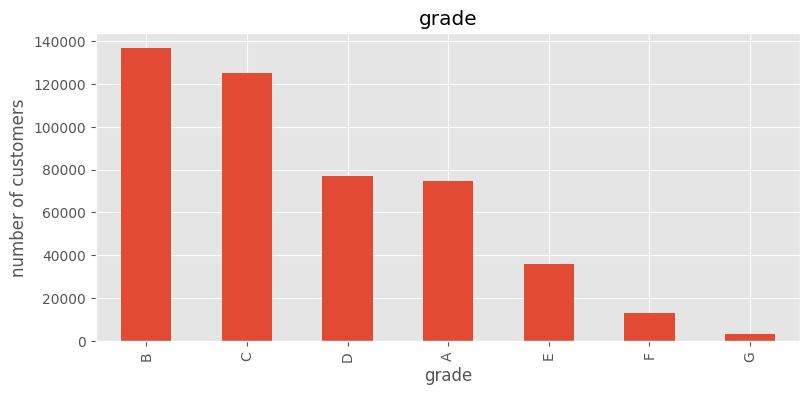

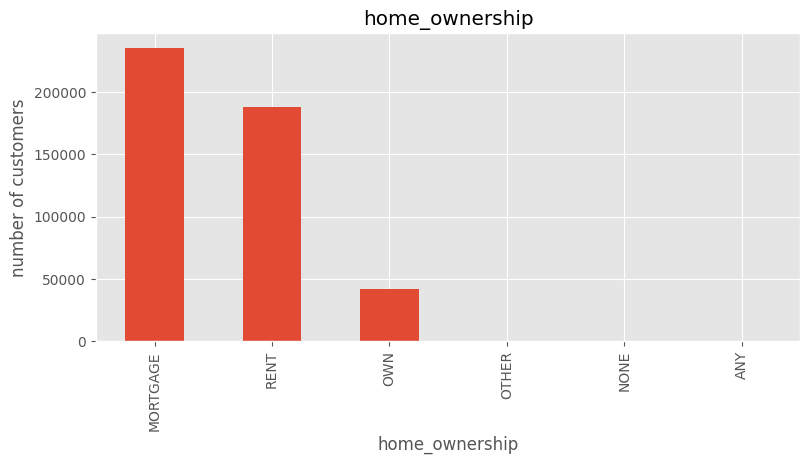

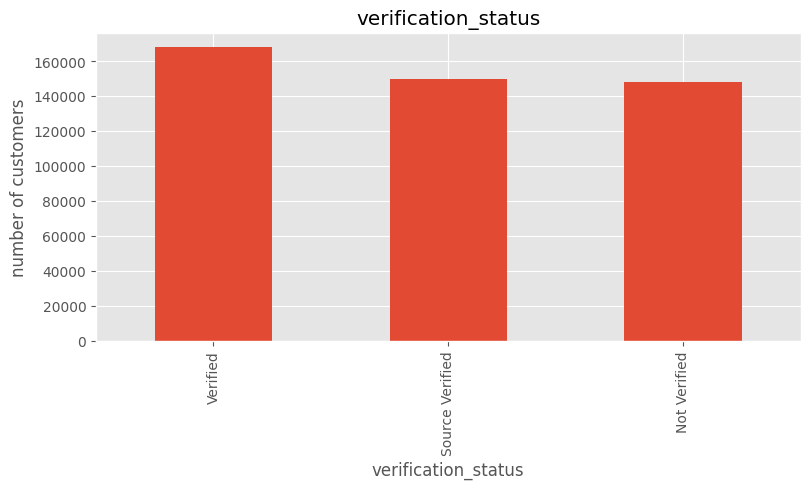

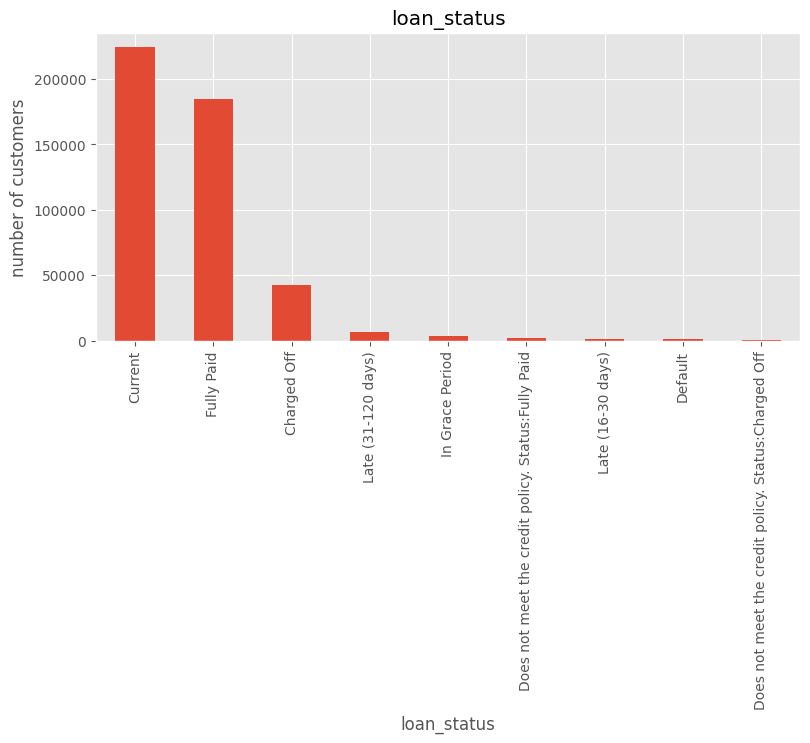

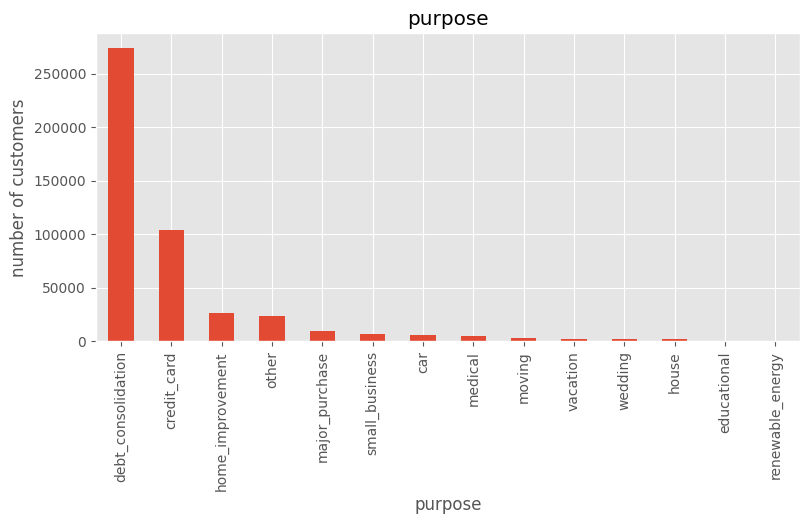

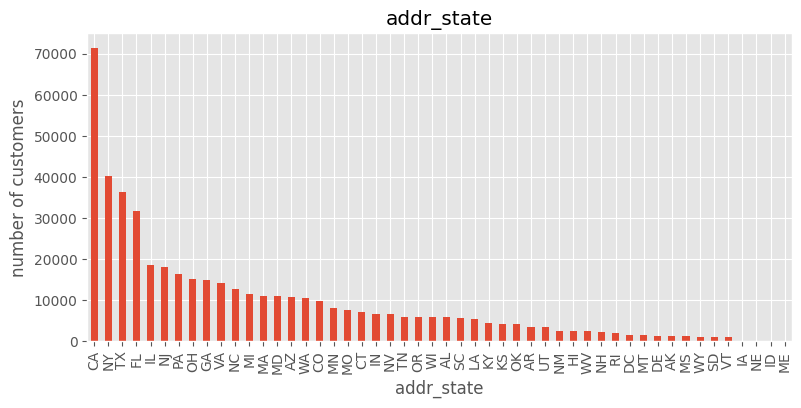

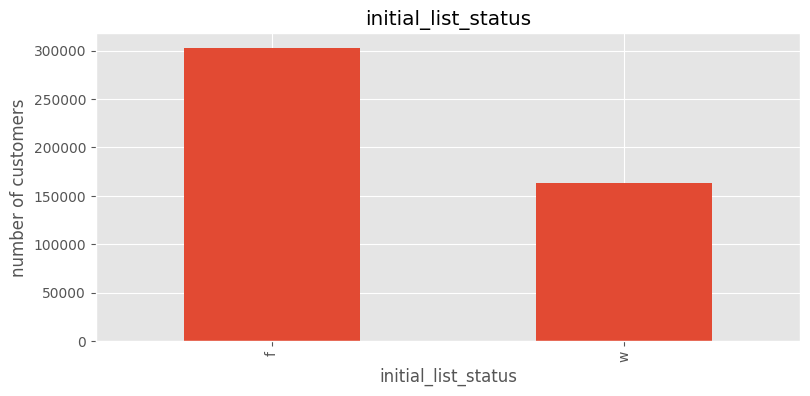

In [45]:
# mengidentifikasi variabel kategorikal
cat_var= data_raw.select_dtypes(include= ['object']).columns
print(cat_var)


# membuat bar chart untuk variabel kategorikal
plt.style.use('ggplot')

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data_raw[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('number of customers')
    plt.title(column)

### data numerik


In [46]:
# mengidentifikasi variabel numerik
num_var= data_raw.select_dtypes(include=np.number)
num_var.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,bad_flag,emp_length_int,term_int,math_since_earliest_cr_line,maths_since_issue_d,maths_since_last_pymnt_d,maths_since_next_pymnt_d,maths_since_last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0,10.0,36.0,17311680.0,3156480.0,1533600.0,NaN,1008000.0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0,1.0,60.0,9819360.0,3156480.0,2455200.0,NaN,2234880.0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0,10.0,36.0,8458560.0,3156480.0,1841760.0,NaN,1008000.0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0,10.0,36.0,11482560.0,3156480.0,1533600.0,NaN,1533600.0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0,1.0,60.0,11527200.0,3156480.0,1008000.0,963360.0,1008000.0


Ringkasan statistik dari loan_amnt
Rata - Rata: 14317.28
standar deviasi : 8286.51
Median : 12000.00
Mode :  10000
Ringkasan statistik dari funded_amnt
Rata - Rata: 14291.80
standar deviasi : 8274.37
Median : 12000.00
Mode :  10000
Ringkasan statistik dari funded_amnt_inv
Rata - Rata: 14222.33
standar deviasi : 8297.64
Median : 12000.00
Mode :  10000.0
Ringkasan statistik dari int_rate
Rata - Rata: 13.83
standar deviasi : 4.36
Median : 13.66
Mode :  12.99
Ringkasan statistik dari installment
Rata - Rata: 432.06
standar deviasi : 243.49
Median : 379.89
Mode :  327.34
Ringkasan statistik dari annual_inc
Rata - Rata: 73277.38
standar deviasi : 54963.57
Median : 63000.00
Mode :  60000.0
Ringkasan statistik dari dti
Rata - Rata: 17.22
standar deviasi : 7.85
Median : 16.87
Mode :  14.4
Ringkasan statistik dari delinq_2yrs
Rata - Rata: 0.28
standar deviasi : 0.80
Median : 0.00
Mode :  0.0
Ringkasan statistik dari inq_last_6mths
Rata - Rata: 0.80
standar deviasi : 1.09
Median : 0.00
Mode :  0.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9360\1457330709.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,4))


Ringkasan statistik dari mths_since_last_record
Rata - Rata: 74.31
standar deviasi : 30.36
Median : 76.00
Mode :  0.0
Ringkasan statistik dari open_acc
Rata - Rata: 11.19
standar deviasi : 4.99
Median : 10.00
Mode :  9.0
Ringkasan statistik dari pub_rec
Rata - Rata: 0.16
standar deviasi : 0.51
Median : 0.00
Mode :  0.0
Ringkasan statistik dari revol_bal
Rata - Rata: 16230.20
standar deviasi : 20676.25
Median : 11764.00
Mode :  0
Ringkasan statistik dari revol_util
Rata - Rata: 56.18
standar deviasi : 23.73
Median : 57.60
Mode :  0.0
Ringkasan statistik dari total_acc
Rata - Rata: 25.06
standar deviasi : 11.60
Median : 23.00
Mode :  21.0
Ringkasan statistik dari out_prncp
Rata - Rata: 4410.06
standar deviasi : 6355.08
Median : 441.47
Mode :  0.0
Ringkasan statistik dari out_prncp_inv
Rata - Rata: 4408.45
standar deviasi : 6353.20
Median : 441.38
Mode :  0.0
Ringkasan statistik dari total_pymnt
Rata - Rata: 11540.69
standar deviasi : 8265.63
Median : 9419.25
Mode :  6743.73
Ringkasan sta

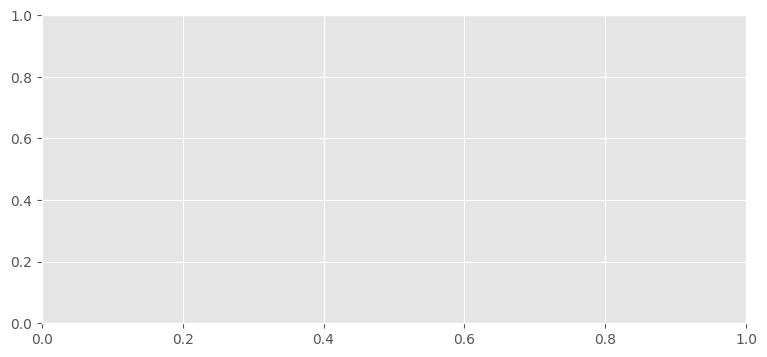

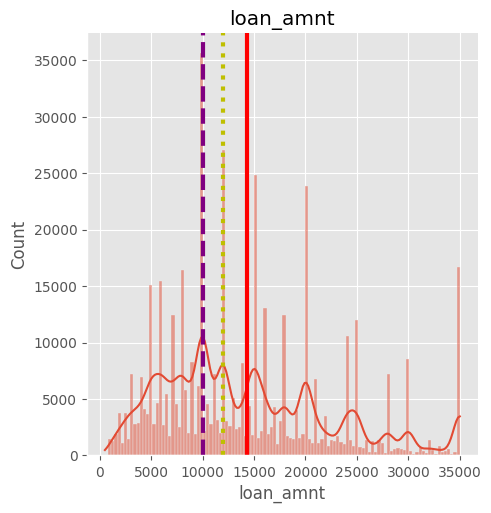

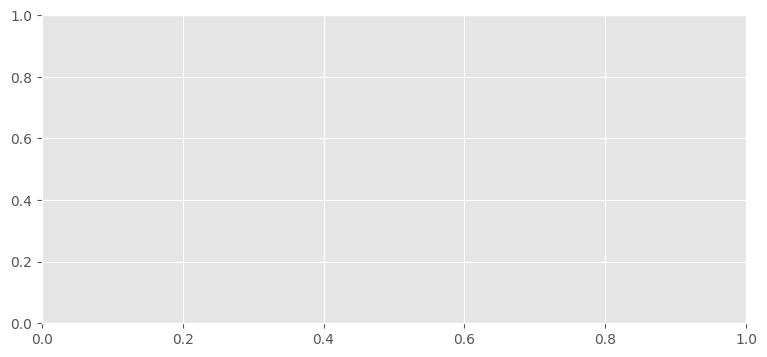

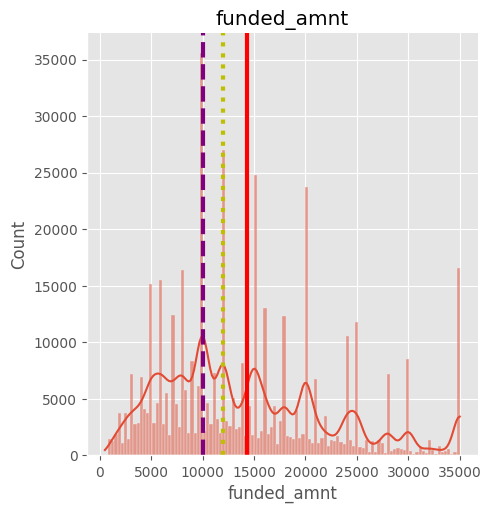

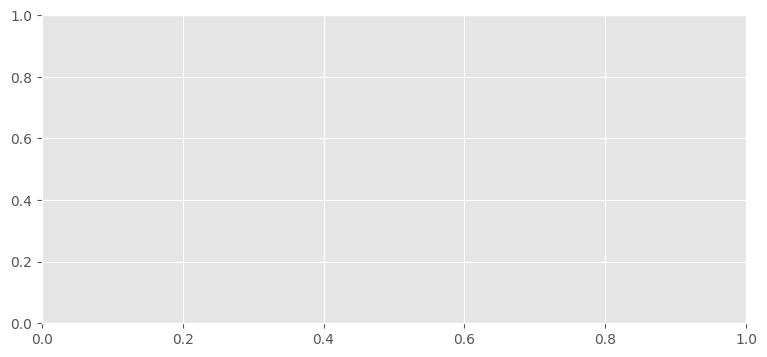

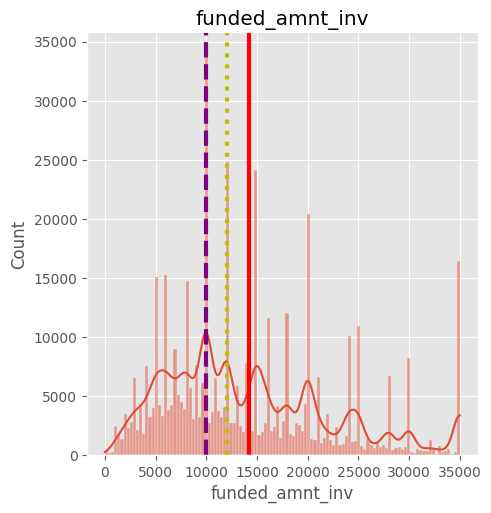

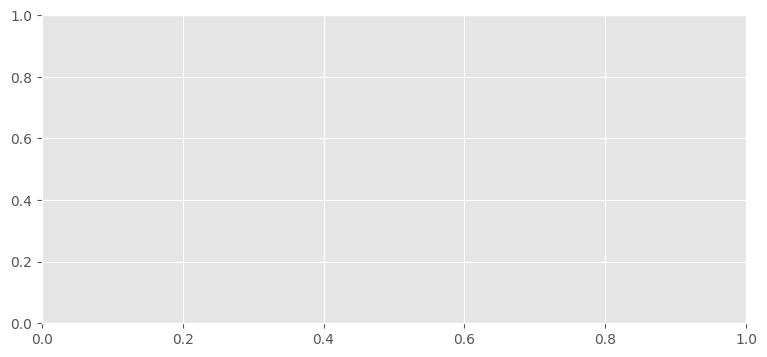

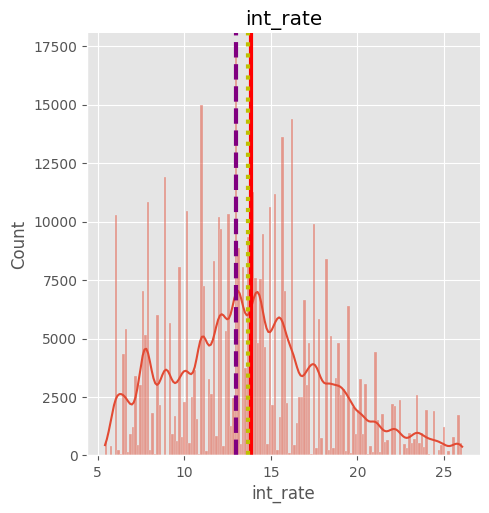

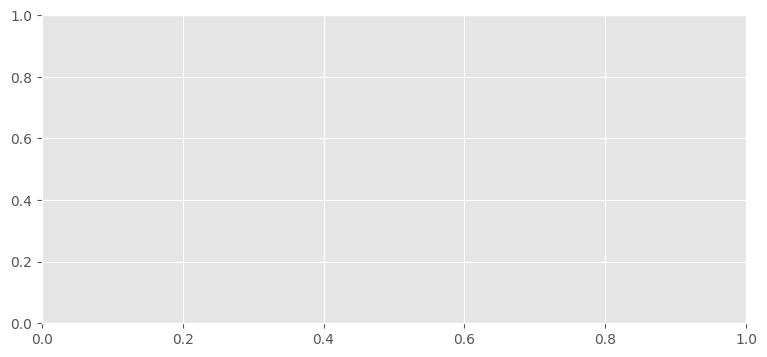

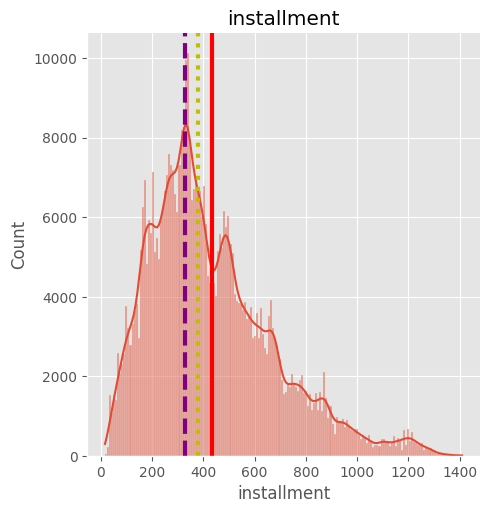

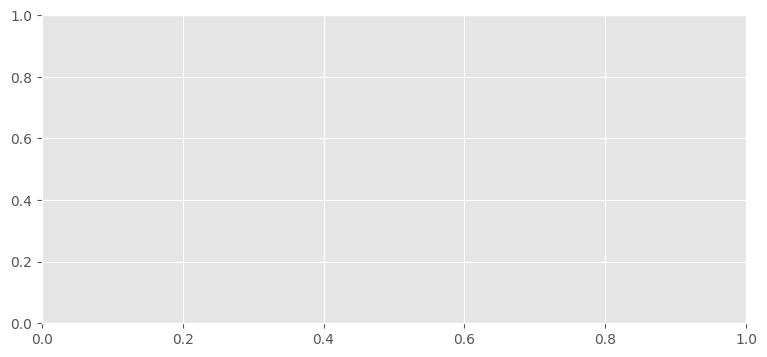

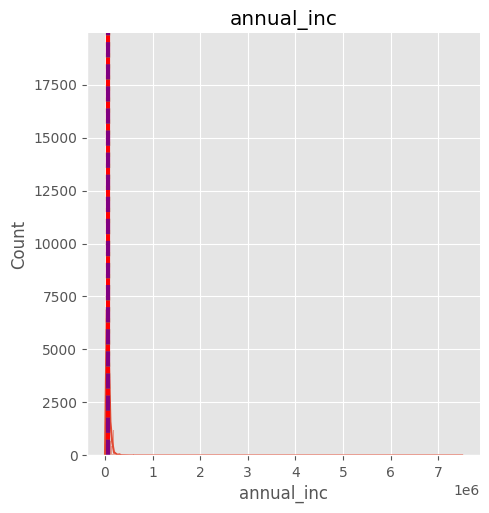

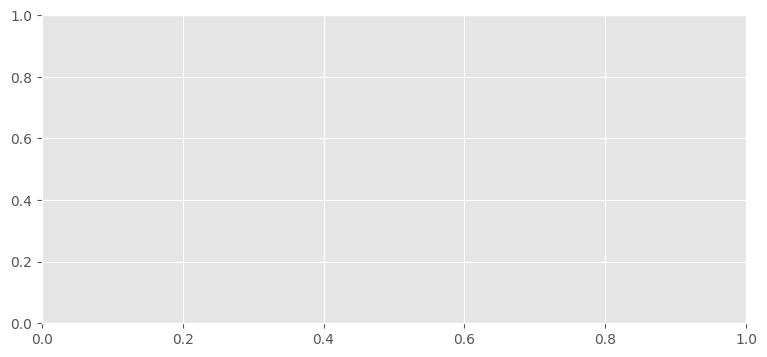

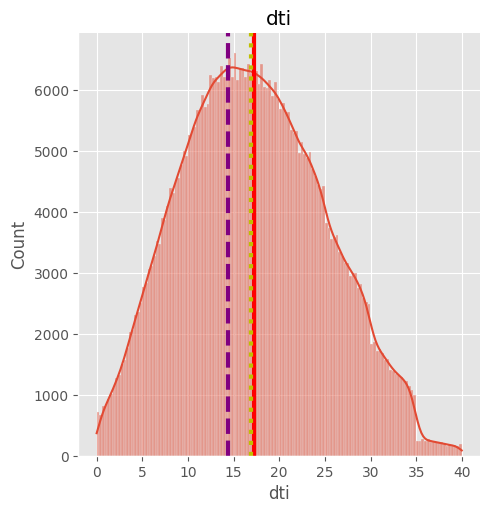

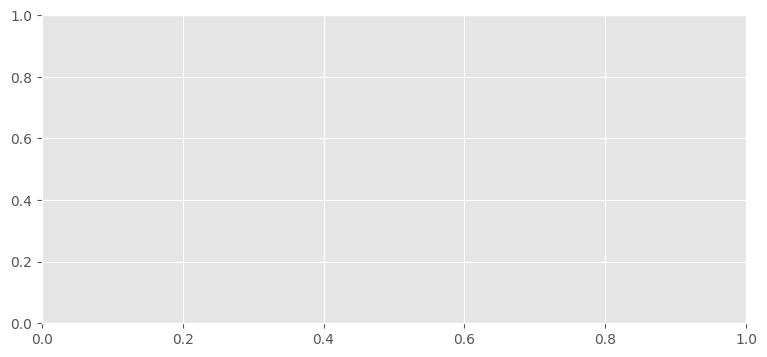

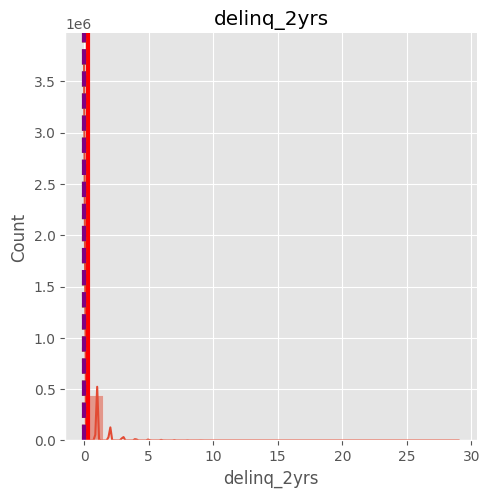

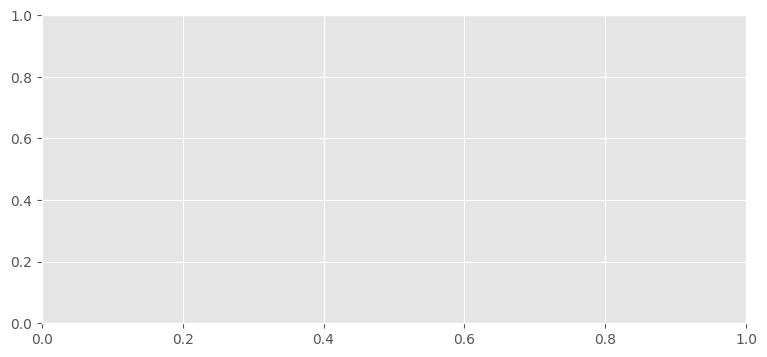

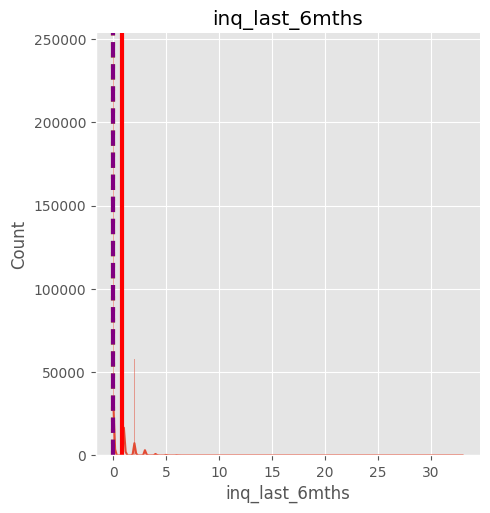

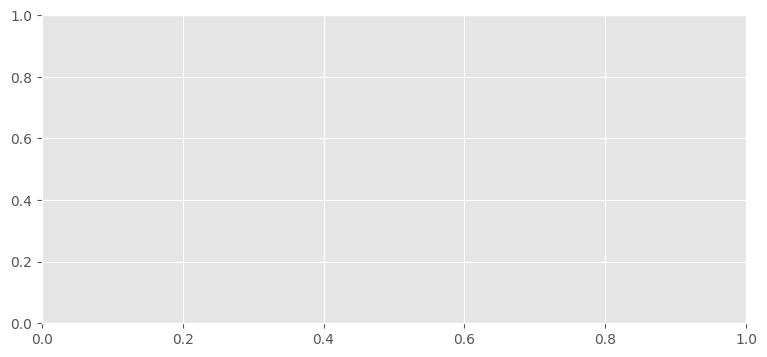

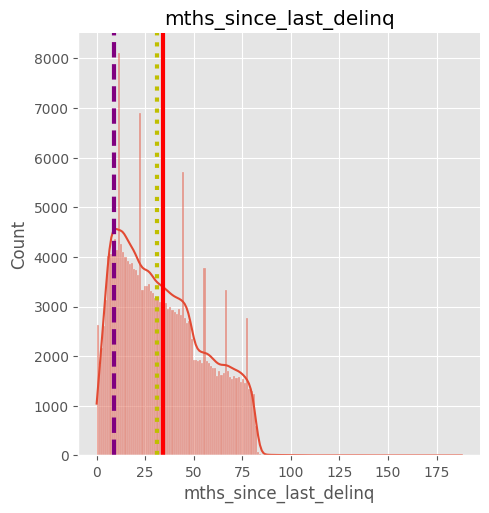

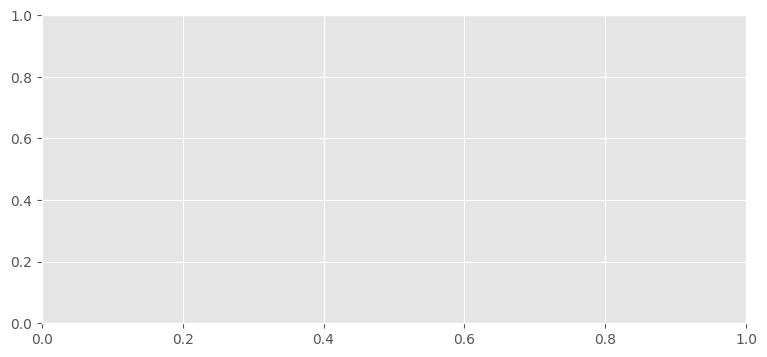

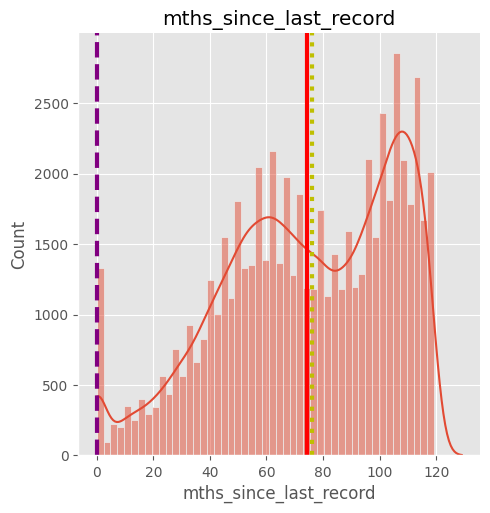

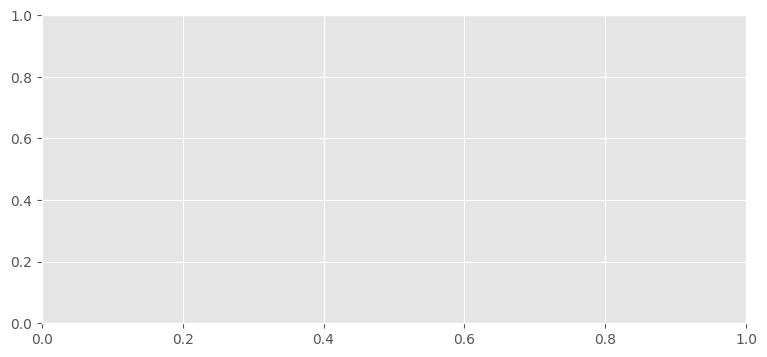

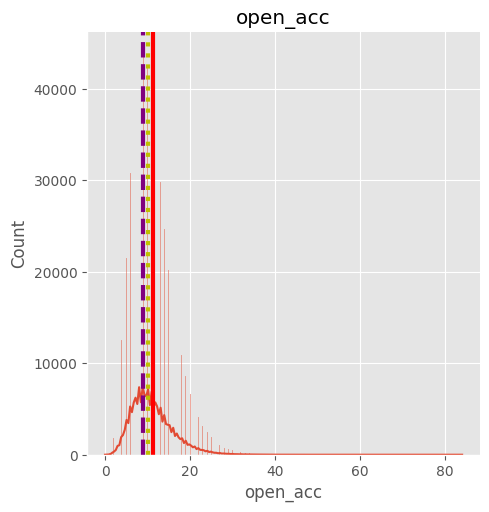

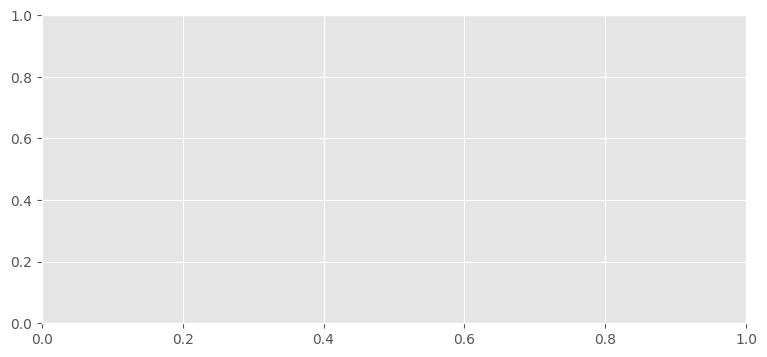

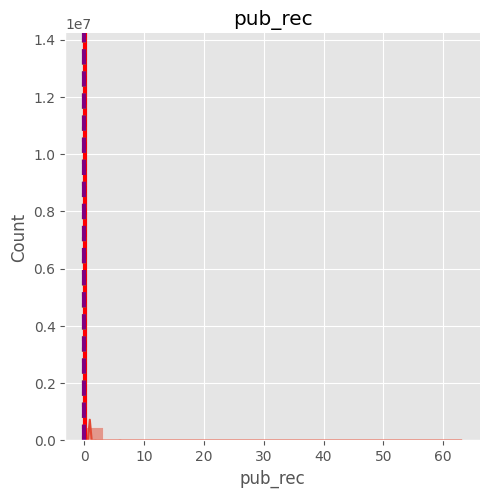

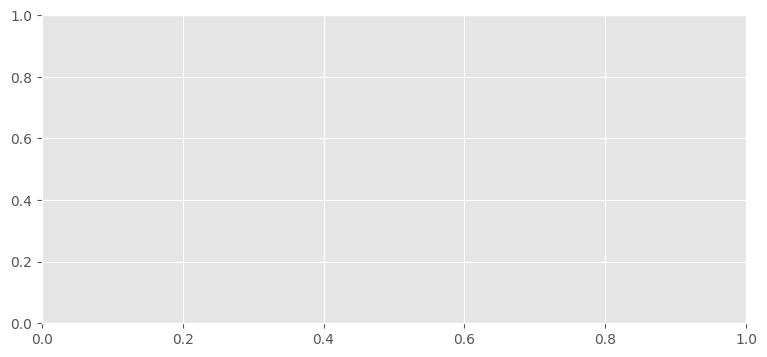

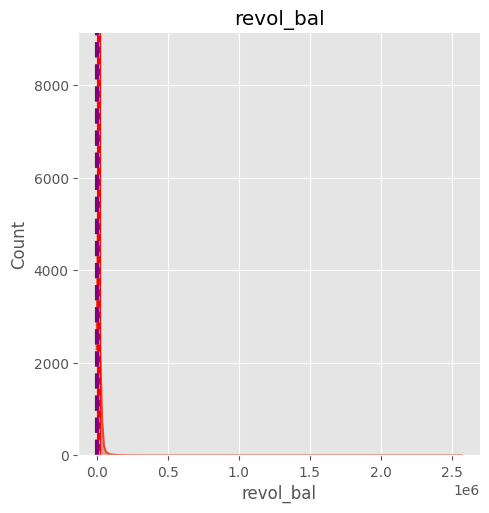

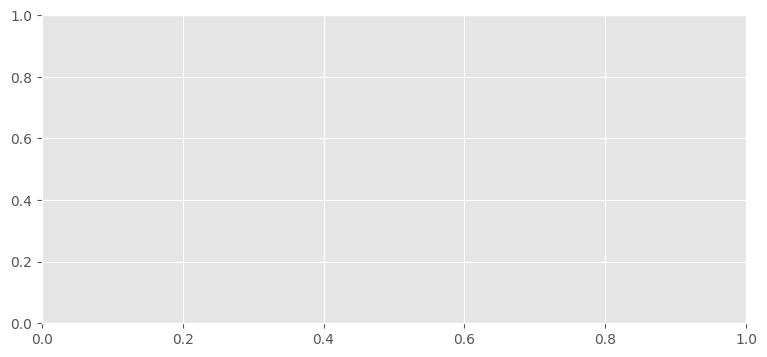

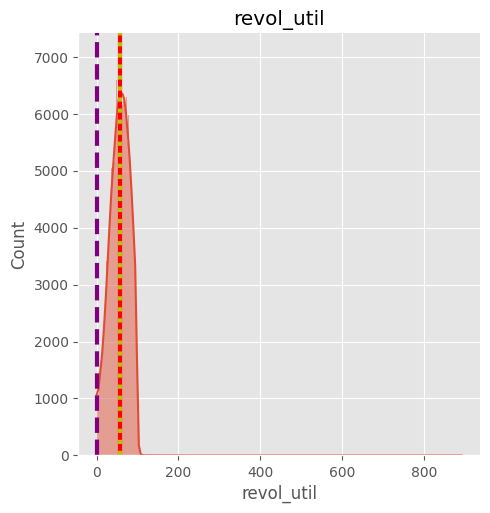

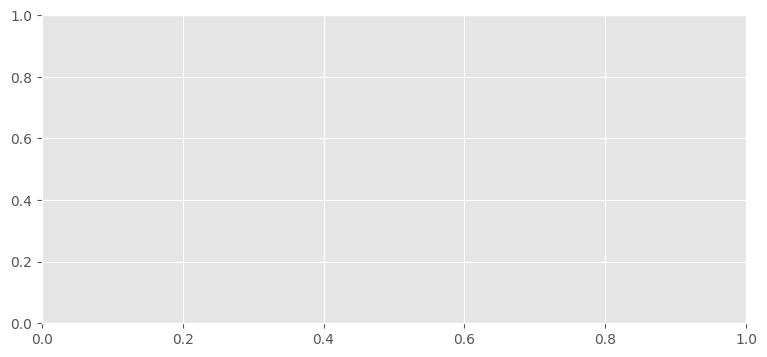

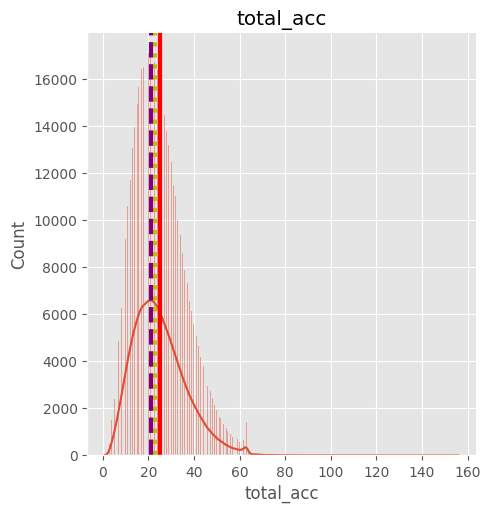

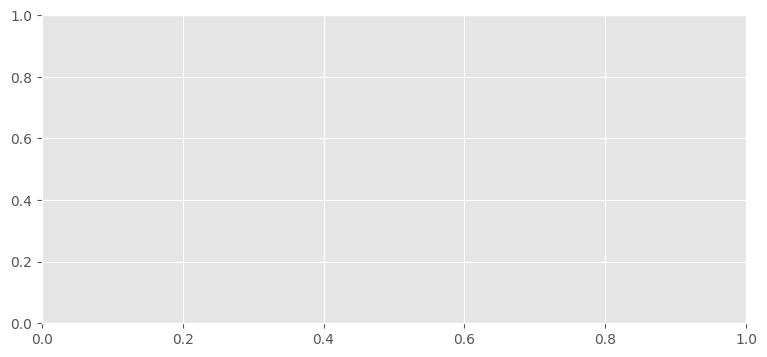

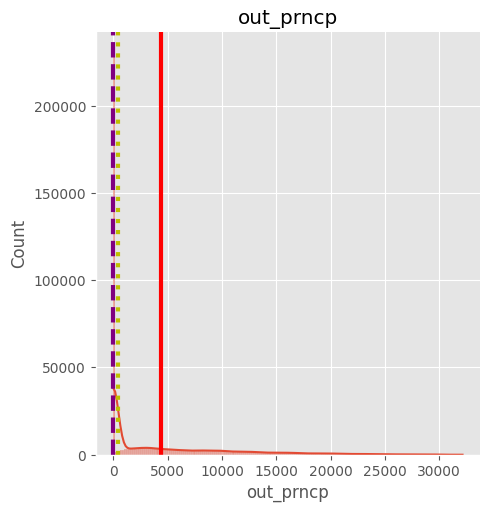

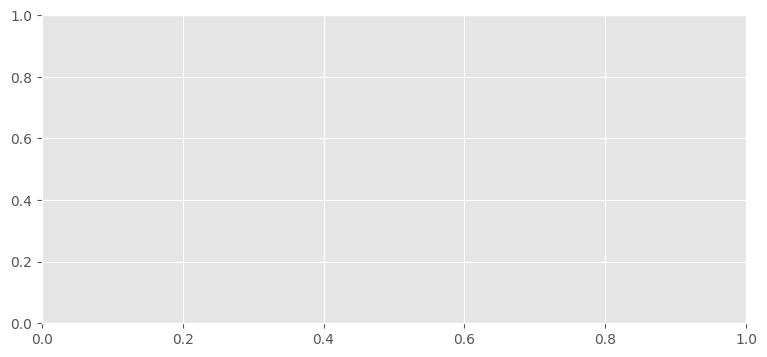

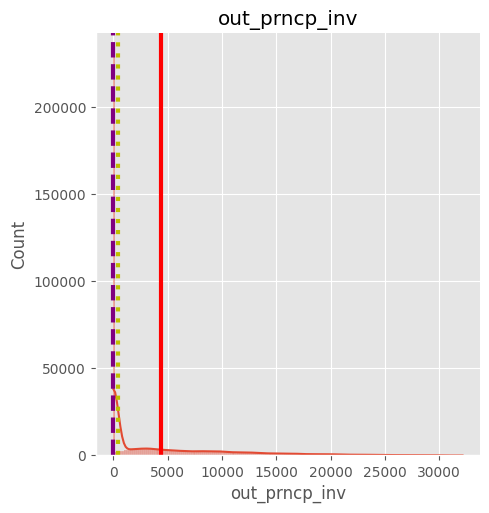

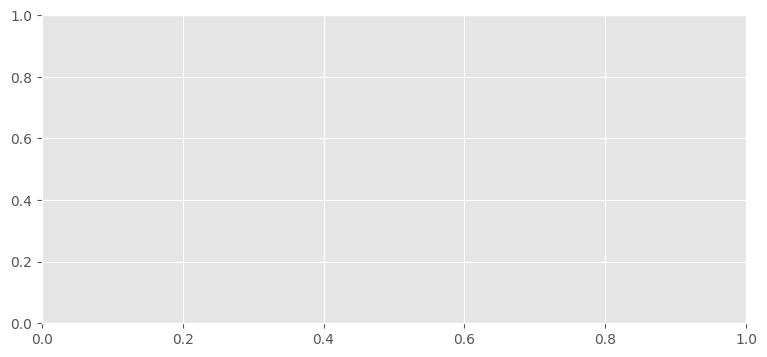

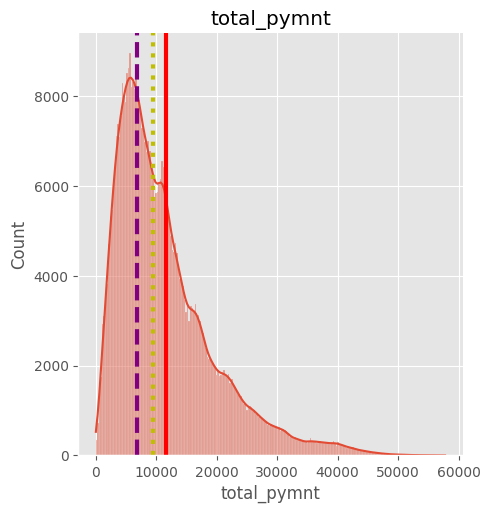

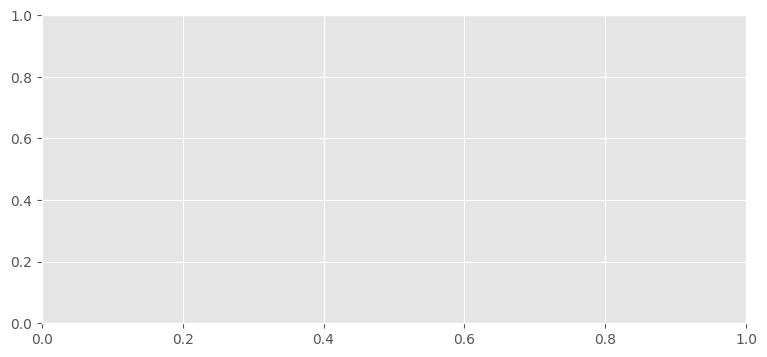

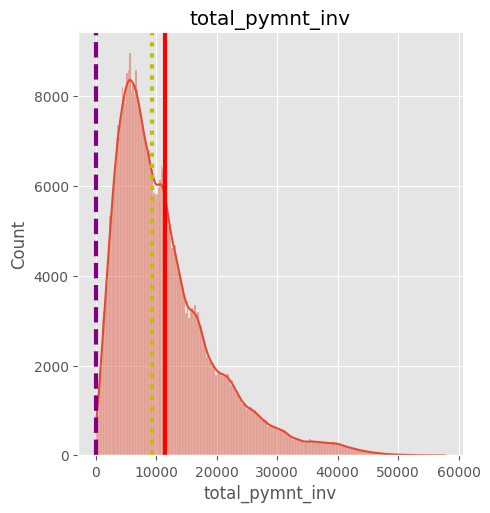

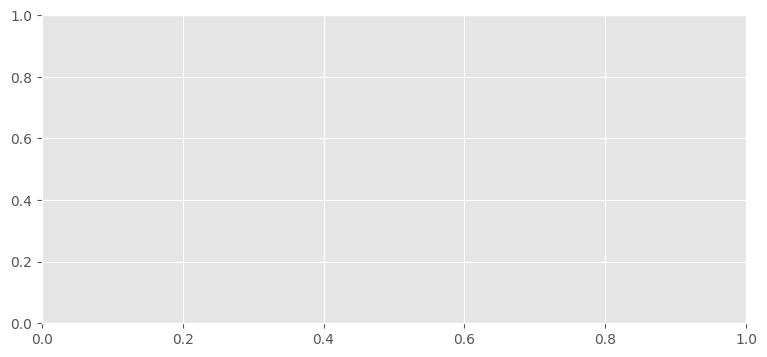

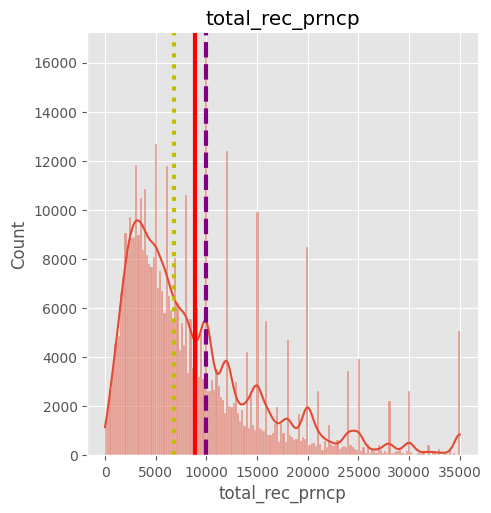

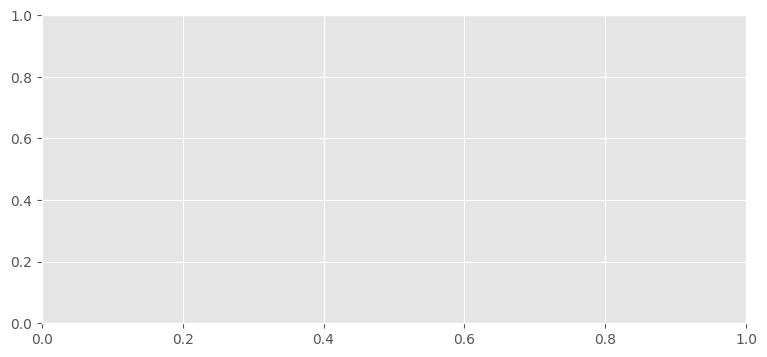

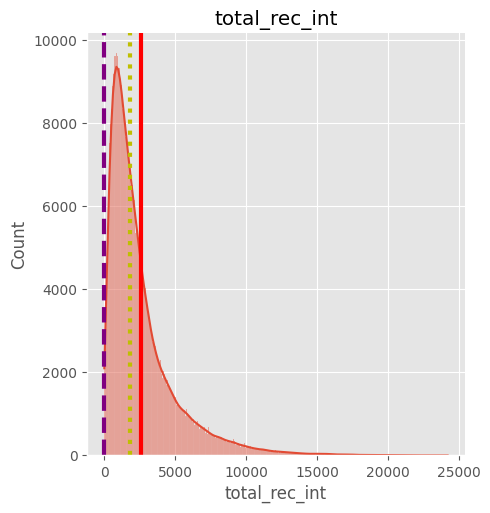

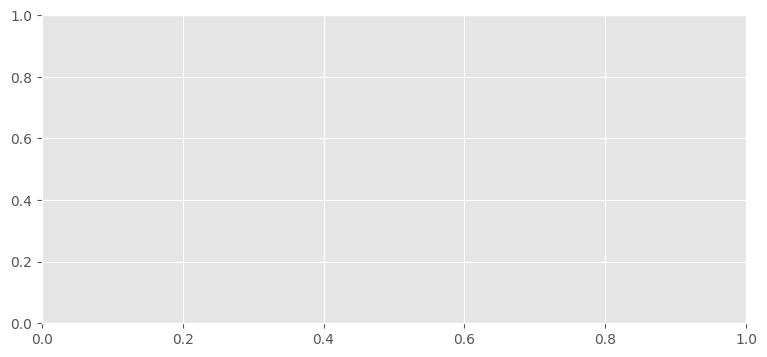

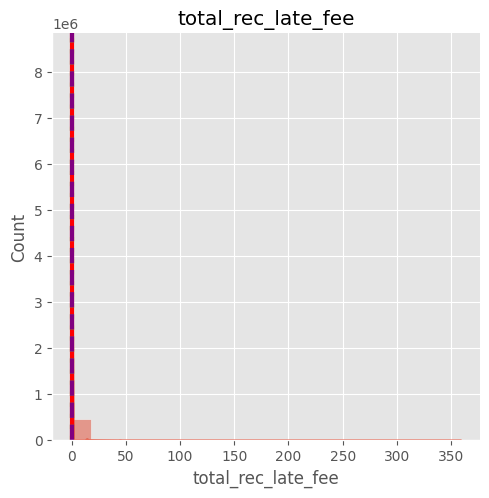

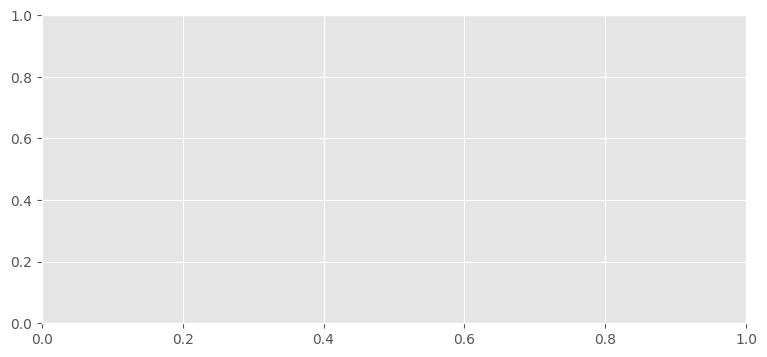

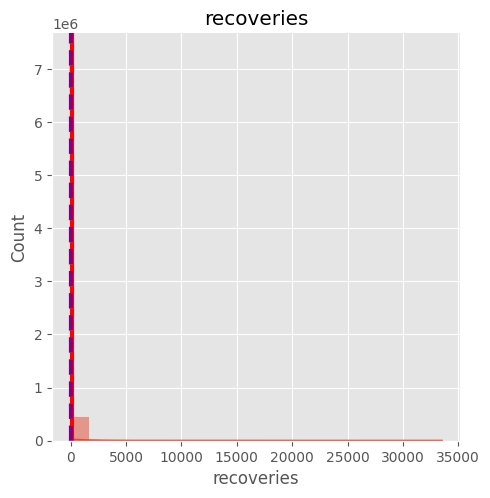

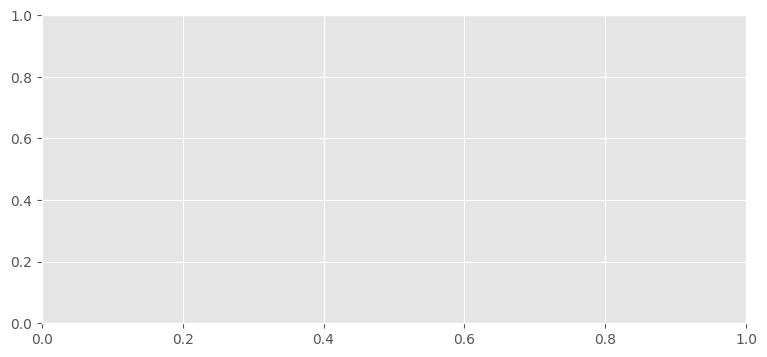

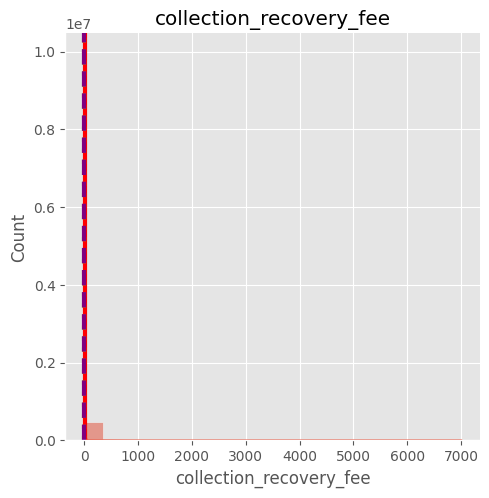

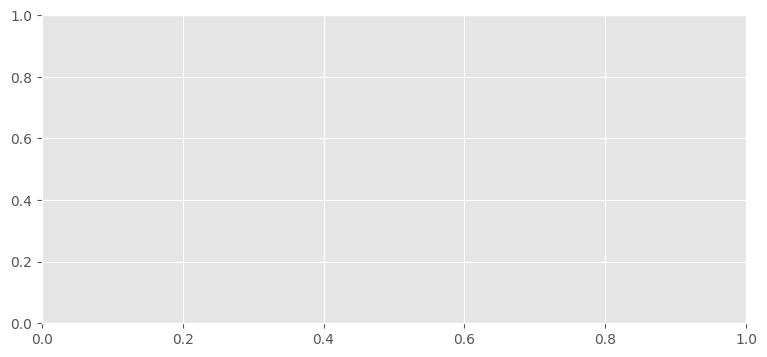

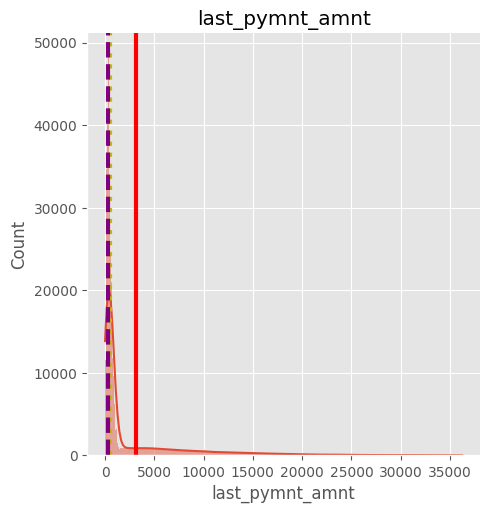

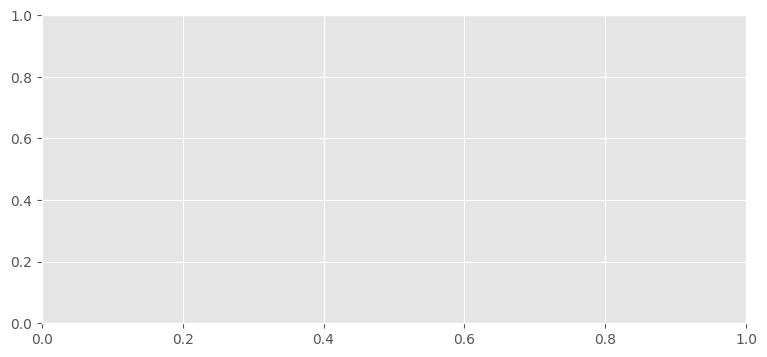

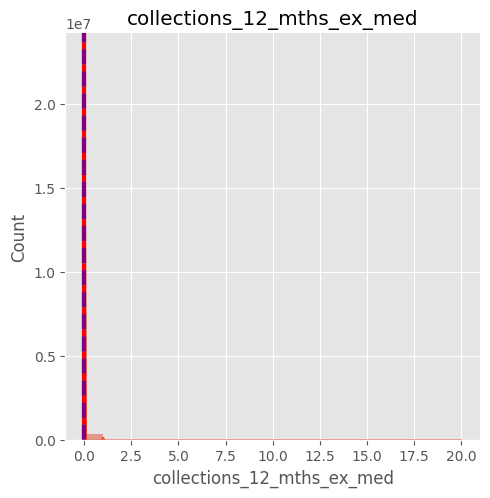

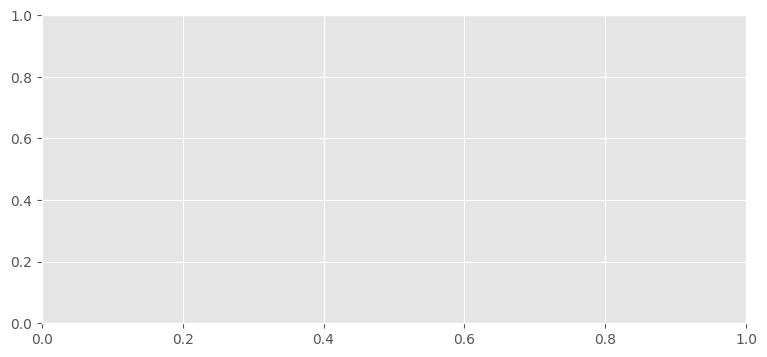

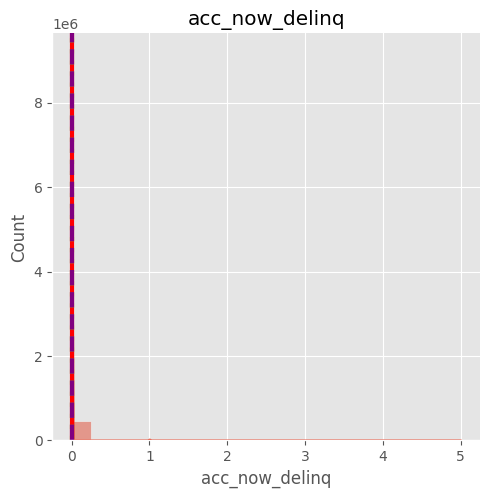

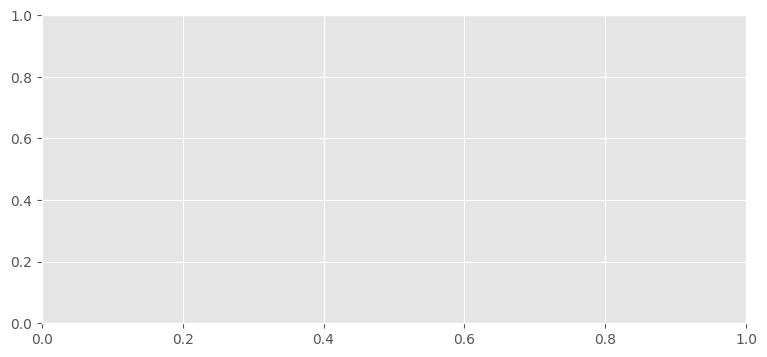

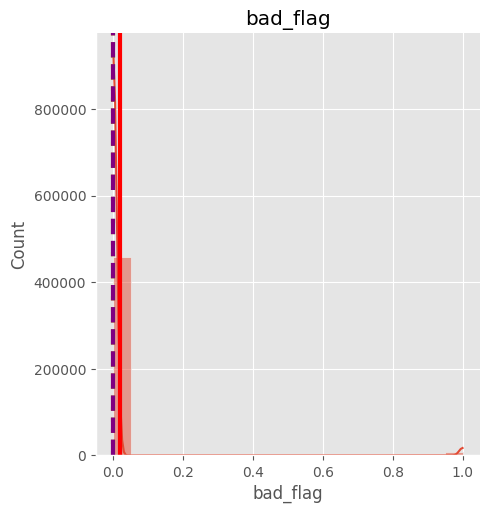

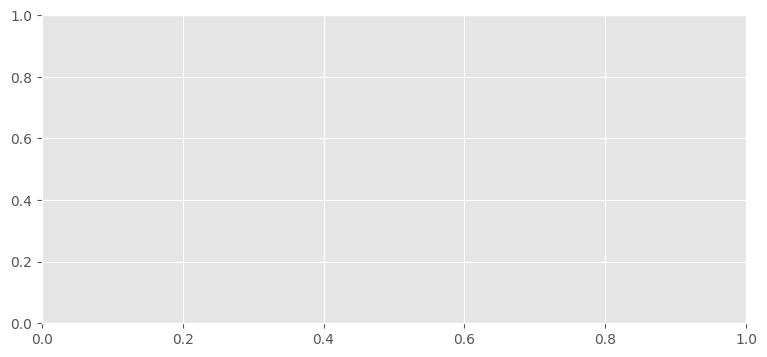

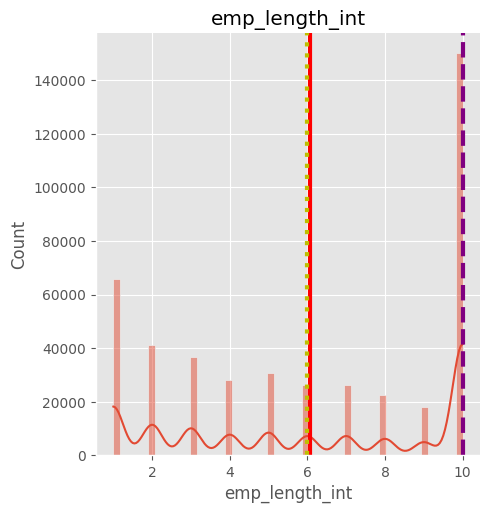

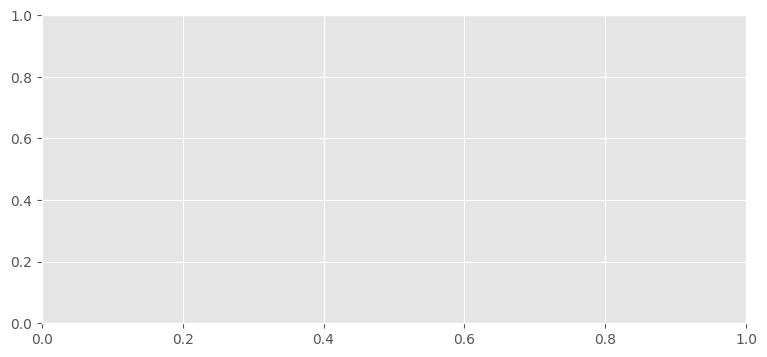

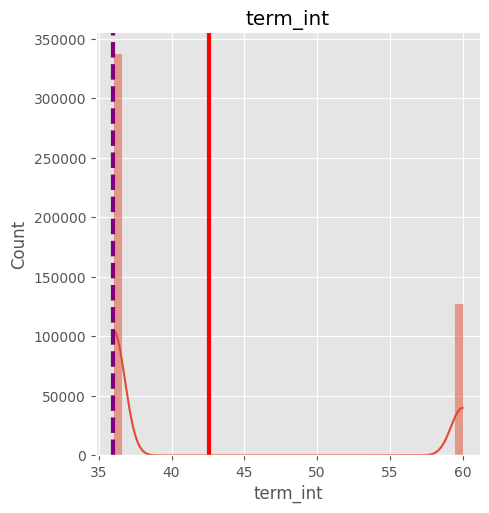

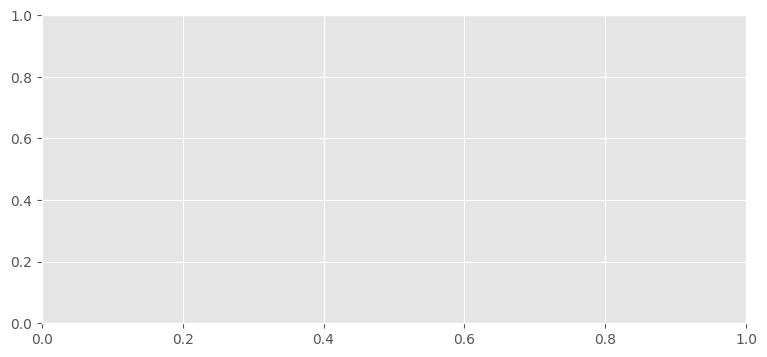

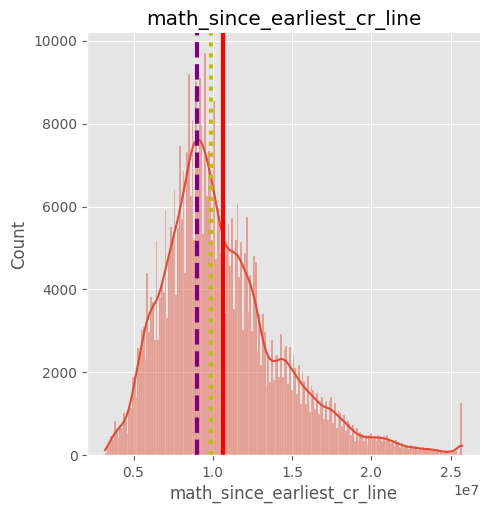

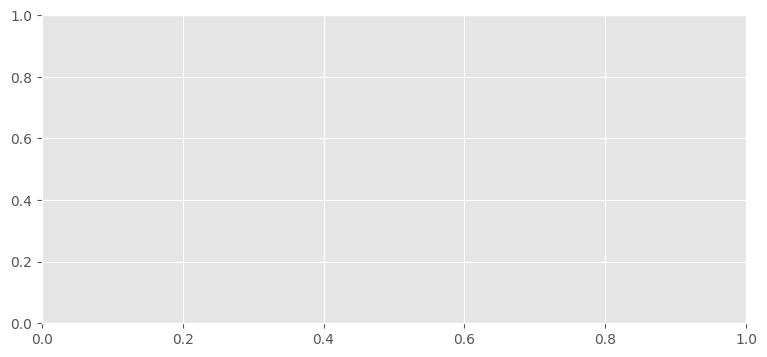

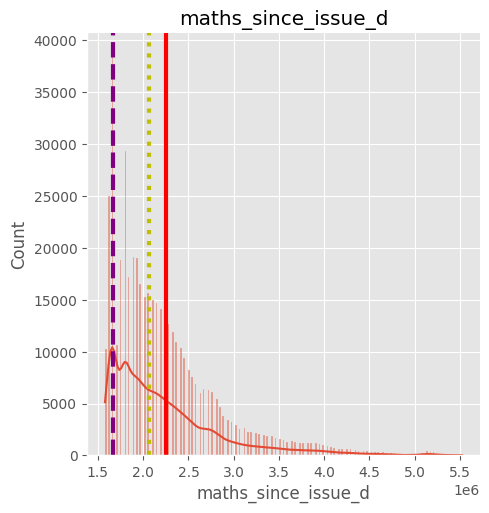

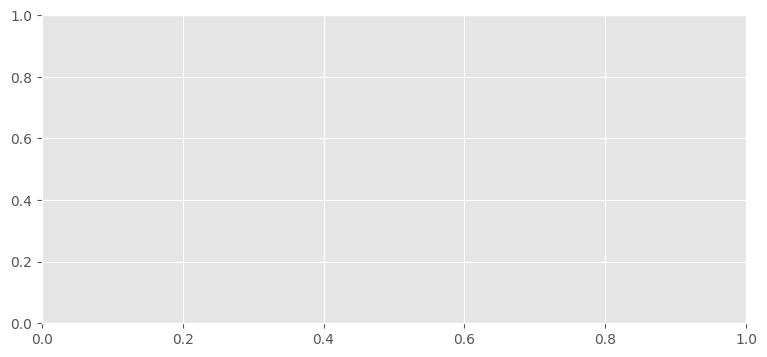

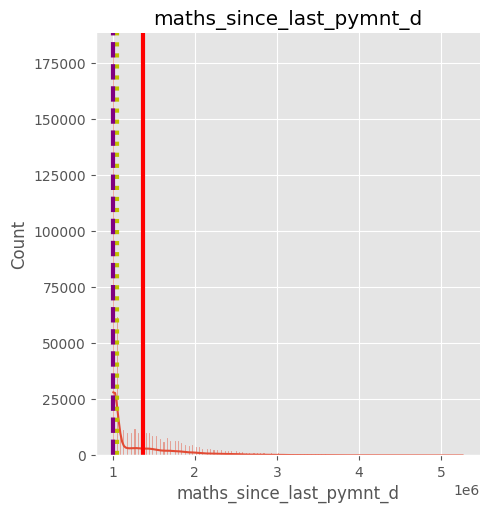

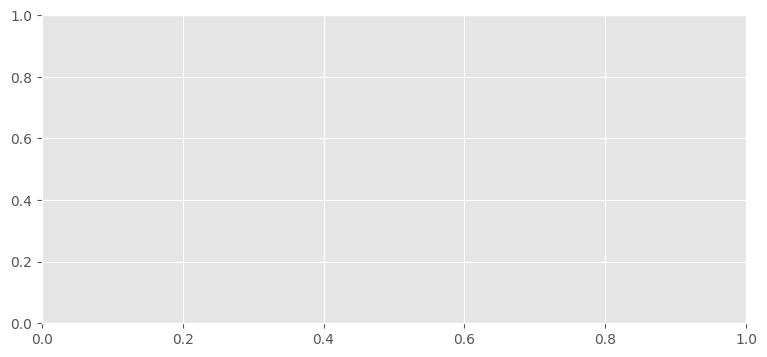

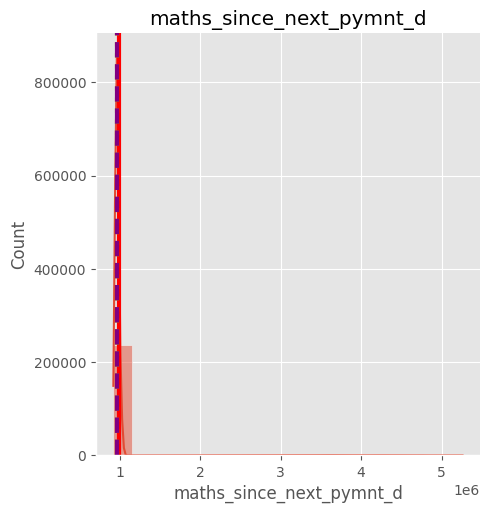

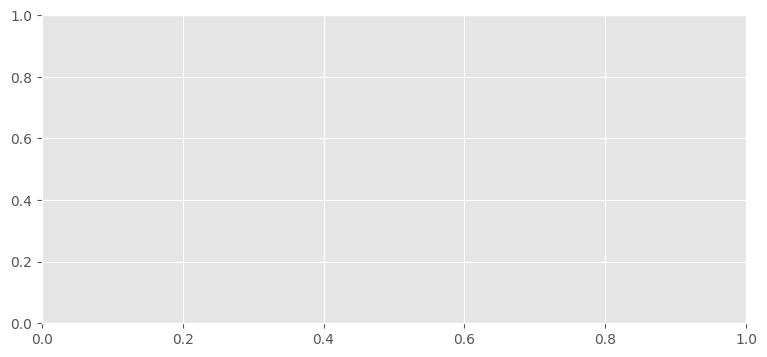

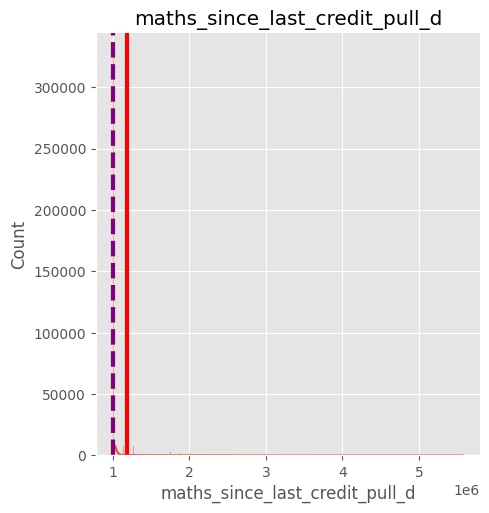

In [47]:
# plotting histogram untuk setiap variabel numerik
plt.style.use('ggplot')
for column in data_raw.select_dtypes(exclude='object').columns.tolist():
    # menghitung statistik deskriptif
    average = data_raw[column].mean()
    median = data_raw[column].median()
    mode = data_raw[column].mode().iloc[0] # mengambil mode pertama karena bisa ada lebih dari satu mode
    std= data_raw[column].std()  
    
    # membuat subplot untuk histogram
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.displot(data_raw[column], kde=True)
    plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='mean')
    plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='nedian')
    plt.axvline(mode, color='purple', linestyle='dashed', linewidth=3, label='mode')
    plt.title(column)
    
    # menampilkan ringkasan statistik
    print('Ringkasan statistik dari {columns}'.format(columns=column))
    print('Rata - Rata:', '%.2f' % average)
    print('standar deviasi :', '%.2f' % std)
    print('Median :', '%.2f' % median)
    print('Mode : ', mode)

## Bivariate Analysis


data kategorikal


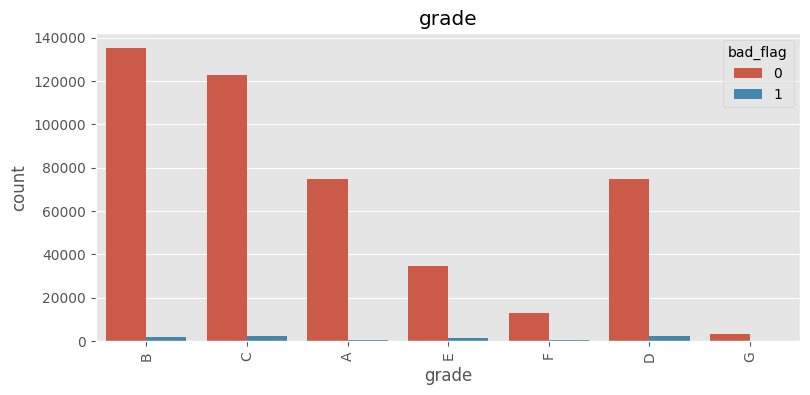

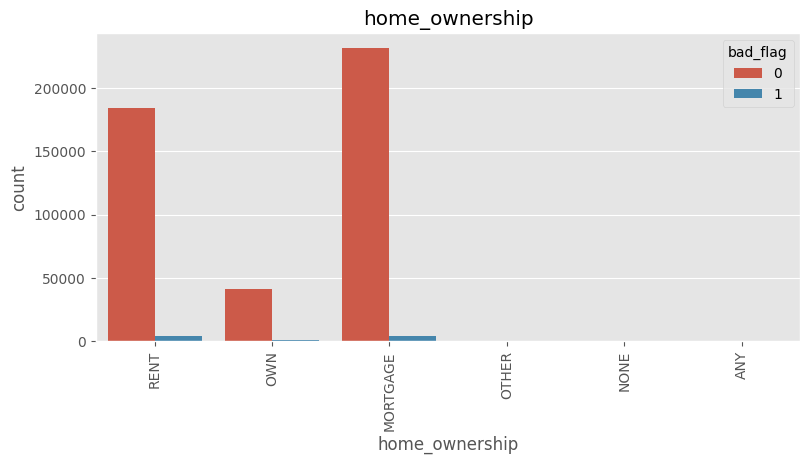

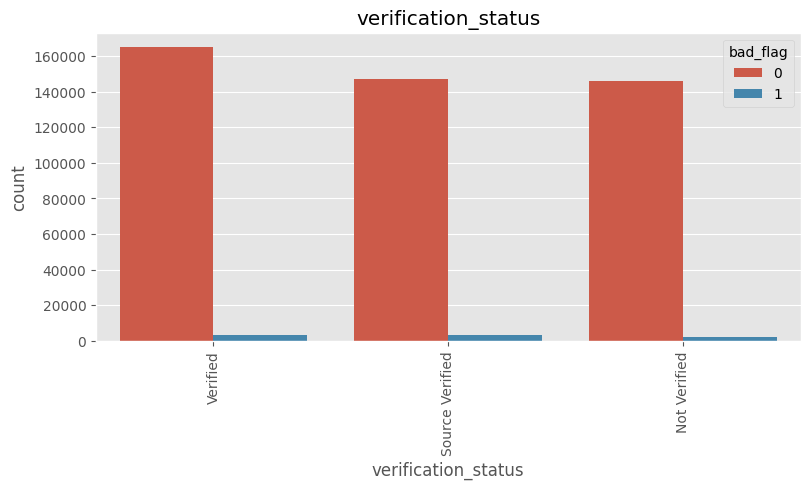

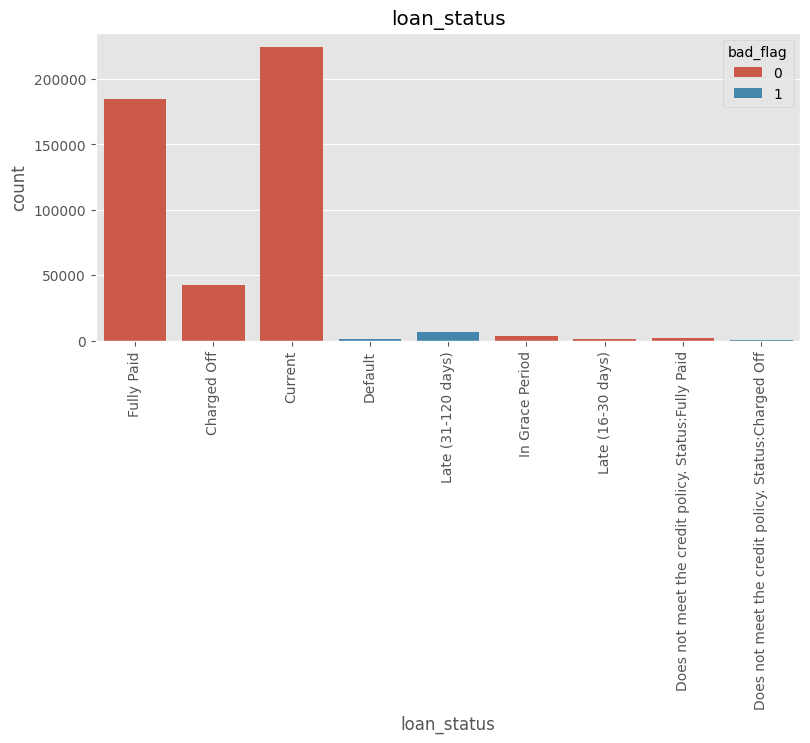

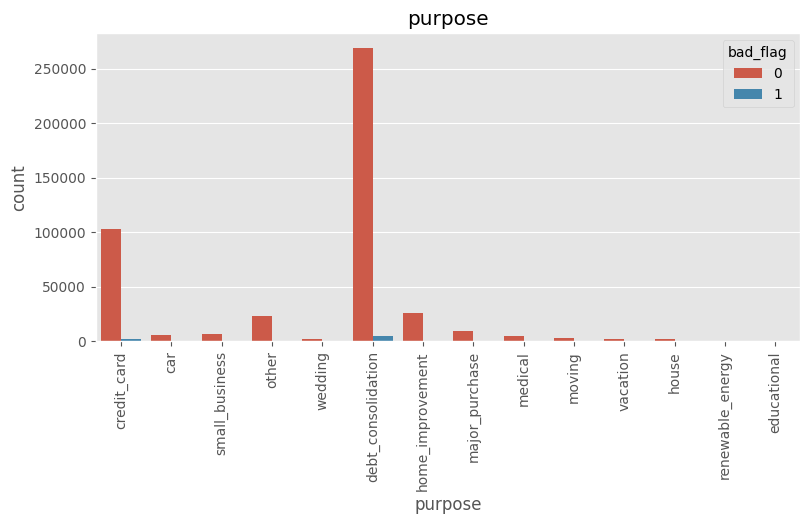

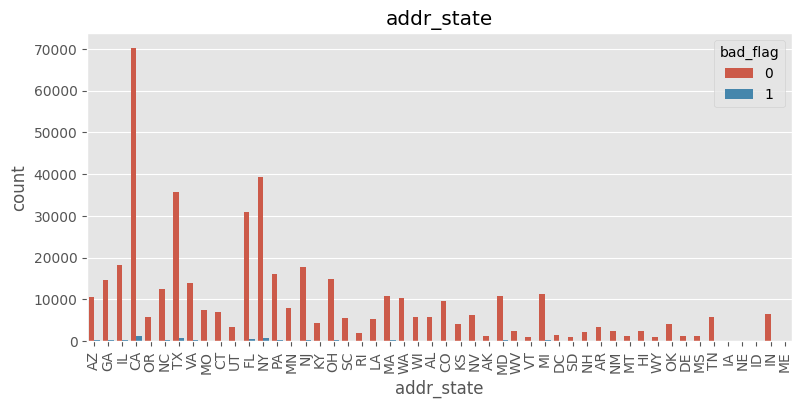

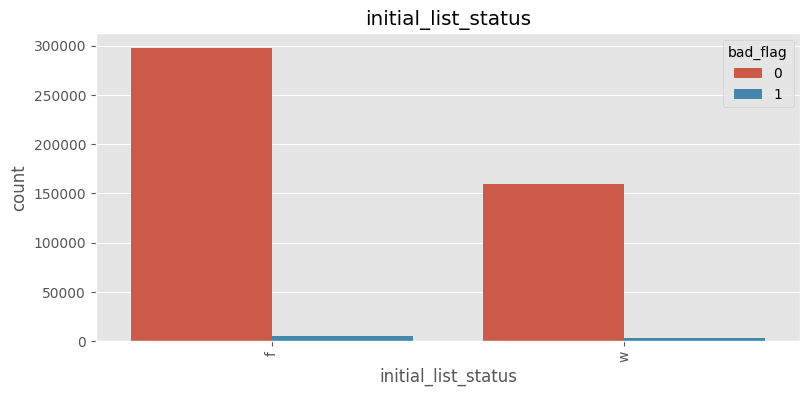

In [48]:
plt.style.use('ggplot')
for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=data_raw[column], hue=data_raw['bad_flag'])
    plt.title(column)
    plt.xticks(rotation=90)

 # Data Preprocessing


### Check Missing Value


In [49]:
# menghitung persentase nilai yang hilang untuk setiap fitur
cek_missing = data_raw.isnull().sum() * 100 / data_raw.shape[0]

# memilih hanya fitur yg memiliki nilai yg hilang
missing_values = cek_missing[cek_missing > 0 ].sort_values(ascending=False)

# menampilkan hasil 
print('persentase nilai yg hilang untuk setiap fitur')
print(missing_values)

persentase nilai yg hilang untuk setiap fitur
mths_since_last_record            86.566585
mths_since_last_delinq            53.690554
maths_since_next_pymnt_d          48.728567
emp_length_int                     4.505399
maths_since_last_pymnt_d           0.080637
revol_util                         0.072917
collections_12_mths_ex_med         0.031097
maths_since_last_credit_pull_d     0.009007
delinq_2yrs                        0.006219
inq_last_6mths                     0.006219
open_acc                           0.006219
pub_rec                            0.006219
total_acc                          0.006219
acc_now_delinq                     0.006219
math_since_earliest_cr_line        0.006219
annual_inc                         0.000858
dtype: float64


In [50]:
data_raw.drop('mths_since_last_record', axis=1, inplace=True)


## Data imputation


In [51]:
data_raw['annual_inc'].fillna(data_raw['annual_inc'].median(), inplace=True)
data_raw['math_since_earliest_cr_line'].fillna(0, inplace=True)
data_raw['acc_now_delinq'].fillna(0, inplace=True)
data_raw['total_acc'].fillna(0, inplace=True)
data_raw['pub_rec'].fillna(0, inplace=True)
data_raw['open_acc'].fillna(0, inplace=True)
data_raw['inq_last_6mths'].fillna(0, inplace=True)
data_raw['delinq_2yrs'].fillna(0, inplace=True)
data_raw['collections_12_mths_ex_med'].fillna(0, inplace=True)
data_raw['revol_util'].fillna(0, inplace=True)
data_raw['emp_length_int'].fillna(0, inplace=True)
data_raw['mths_since_last_delinq'].fillna(-1, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9360\1605446131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['annual_inc'].fillna(data_raw['annual_inc'].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9360\1605446131.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

## Label encoding


In [52]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for column in cat_var:
    data_raw[column] = label.fit_transform(data_raw[column])

In [53]:
data_raw.head()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,bad_flag,emp_length_int,term_int,math_since_earliest_cr_line,maths_since_issue_d,maths_since_last_pymnt_d,maths_since_next_pymnt_d,maths_since_last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,1,5,24000.0,2,5,1,3,27.65,0.0,1.0,-1.0,3.0,0.0,13648,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0,10.0,36.0,17311680.0,3156480.0,1533600.0,NaN,1008000.0
1,2500,2500,2500.0,15.27,59.83,2,5,30000.0,1,0,0,10,1.00,0.0,5.0,-1.0,3.0,0.0,1687,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0,1.0,60.0,9819360.0,3156480.0,2455200.0,NaN,2234880.0
2,2400,2400,2400.0,15.96,84.33,2,5,12252.0,0,5,11,14,8.72,0.0,2.0,-1.0,2.0,0.0,2956,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0,10.0,36.0,8458560.0,3156480.0,1841760.0,NaN,1008000.0
3,10000,10000,10000.0,13.49,339.31,2,5,49200.0,1,5,9,4,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0,10.0,36.0,11482560.0,3156480.0,1533600.0,NaN,1533600.0
4,3000,3000,3000.0,12.69,67.79,1,5,80000.0,1,1,9,36,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0,1.0,60.0,11527200.0,3156480.0,1008000.0,963360.0,1008000.0


## Handling Imbalanced Data


In [56]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
# Memisahkan fitur (x) dan target (y)
X = data_raw.drop('bad_flag', axis=1)
y = data_raw['bad_flag']

In [58]:
# Mengisi nilai NaN dengan mean menggunakan SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [59]:
# Menggunakan SMOTE untuk oversampling
smote = SMOTE(random_state=12, sampling_strategy=1)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

In [60]:
# Memeriksa bentuk data setelah resampling
print(f'Bentuk X setelah resampling: {X_resampled.shape}')
print(f'Bentuk y setelah resampling: {y_resampled.shape}')

Bentuk X setelah resampling: (915584, 41)
Bentuk y setelah resampling: (915584,)


In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
data_raw_imputed_constant = pd.DataFrame(imputer.fit_transform(data_raw), columns=data_raw.columns)


## Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# menampilkan bentuk shape dari set pelatihan dan pengujian
print('bentuk shape dari data pelatihan:', X_train.shape)
print('bentuk shape dari data uji:', X_test.shape)

bentuk shape dari data pelatihan: (732467, 41)
bentuk shape dari data uji: (183117, 41)


## Standardization

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [63]:
X_train_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,emp_length_int,term_int,math_since_earliest_cr_line,maths_since_issue_d,maths_since_last_pymnt_d,maths_since_next_pymnt_d,maths_since_last_credit_pull_d
0,-0.743878,-0.740792,-1.453146,-0.029302,-0.598831,1.717432,1.126461,-0.170657,-1.411756,-0.606526,1.569247,1.285008,-1.687620,-0.407216,0.812655,1.466412,-0.620266,0.388109,-0.437012,1.150760,-1.060258,-0.836225,-0.992960,-0.992876,-1.084106,-1.251815,-0.996738,-0.860503,-0.273663,0.419514,-0.064640,-0.333164,-0.098234,-0.07246,-1.404148,-0.749026,-0.684859,4.137869,5.115297,5.982903,7.657795
1,-0.585535,-0.582367,-0.548848,0.047583,-0.403119,-0.129395,-1.121014,-0.208103,1.256468,0.059543,-0.318364,-1.469896,-1.918221,-0.407216,-0.728778,1.846918,0.555487,-0.376819,-0.323722,-0.696832,0.179032,-0.836225,-0.992960,-0.992876,0.059716,0.074781,0.501282,-1.005585,-0.273663,-0.132857,-0.091189,1.870990,-0.098234,-0.07246,-0.215024,-0.749026,-0.816215,-0.577555,0.419784,-0.178214,-0.300104
2,-0.326492,-0.323191,-0.294045,-0.203741,-0.121631,-0.129395,-1.121014,-0.777791,-1.411756,1.058645,-0.318364,-1.618426,0.710635,-0.407216,-0.728778,-0.795211,-0.510402,-0.376819,-0.344468,-0.112132,-0.913581,1.395276,0.322977,0.323404,-0.753159,-0.734528,-0.652433,-0.606219,-0.273663,-0.132857,-0.091189,-0.337287,-0.098234,-0.07246,1.271382,-0.749026,-1.128802,-0.758592,-0.267638,-0.233814,-0.300104
3,-0.196971,-0.193603,-0.166644,-0.039510,-0.579753,-0.129395,1.126461,-0.735592,-0.077644,1.058645,-0.318364,0.758055,0.239244,-0.407216,-0.728778,-0.795211,-0.723580,-0.376819,-0.193741,-0.320953,-1.004632,1.395276,0.472280,0.472746,-0.569023,-0.551200,-0.653090,-0.064679,-0.273663,-0.132857,-0.091189,-0.361889,-0.098234,-0.07246,1.271382,1.582752,-0.897313,-0.337485,-0.329198,-0.233814,-0.300104
4,-0.948196,-0.945214,-0.905571,-1.818684,-0.947672,-1.697861,-1.121014,0.045092,1.256468,-1.272594,-0.765109,-1.321366,-0.126937,-0.407216,-0.004995,0.525854,0.768664,-0.376819,-0.085293,0.208061,0.816390,1.395276,-0.281494,-0.281225,-0.974296,-0.954695,-0.776357,-0.955742,-0.273663,-0.132857,-0.091189,-0.381647,-0.098234,-0.07246,-1.701430,-0.749026,0.017982,-0.819593,-0.454370,-0.157357,-0.300104


## Data Modeling

Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

# Melatih model regresi logistik
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [65]:
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test)

c:\Users\LENOVO\anaconda3\envs\miniproject\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Evaluation

ROC-AUC

c:\Users\LENOVO\anaconda3\envs\miniproject\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ROC-AUC: 0.54079683258568


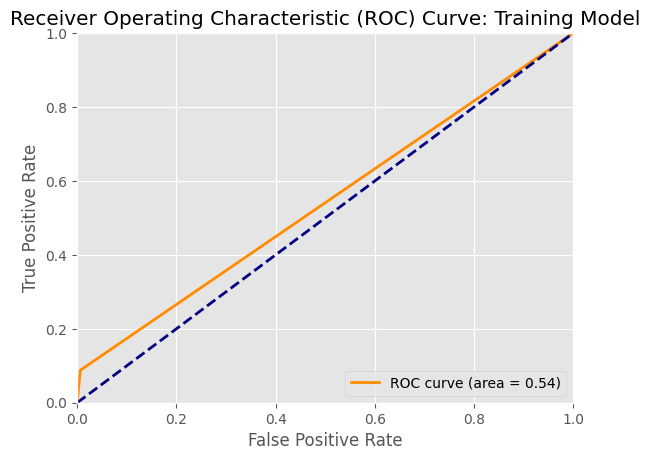

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Membuat prediksi probabilitas
y_prob = logreg.predict_proba(X_test)[:, 1]

# Menghitung ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC: {roc_auc}')

# Menghitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Memvisualisasikan kurva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Training Model')
plt.legend(loc='lower right')
plt.show()


1.  AUC = 0.54:
        Nilai AUC sebesar 0.54 menunjukkan bahwa model sedikit lebih baik daripada tebakkan acak, namun kinerjanya tidak cukup baik untuk digunakan dalam prediksi yang dapat diandalkan.

2. Kurva ROC dekat dengan garis diagonal:
        Kurva ROC yang dekat dengan garis diagonal menunjukkan bahwa model memiliki kinerja yang sangat rendah dalam membedakan antara kelas positif dan negatif.

3. False Positive Rate dan True Positive Rate:
        Pada berbagai threshold, model menghasilkan tingkat positif benar (True Positive Rate) dan tingkat positif palsu (False Positive Rate) yang hampir seimbang, menunjukkan kurangnya kemampuan model untuk membuat prediksi yang akurat.



## Kesimpulan

Model yang dievaluasi melalui kurva ROC tersebut menunjukkan kinerja yang sangat rendah dengan AUC sebesar 0.54. Ini mengindikasikan bahwa model hampir tidak lebih baik daripada tebakkan acak dan mungkin memerlukan peningkatan seperti pemilihan fitur yang lebih baik, teknik prapemrosesan yang lebih baik, atau penggunaan model yang berbeda.